In [3]:
#import all the necessary libraries library

import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# import warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split

In [4]:
#machine learning libraries:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, KFold, cross_val_score
from sklearn.preprocessing  import StandardScaler, LabelEncoder, MinMaxScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestRegressor
from xgboost import XGBRegressor, XGBClassifier
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import (BaggingRegressor, AdaBoostRegressor,GradientBoostingRegressor, 
                              RandomForestRegressor,  GradientBoostingRegressor)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score
import xgboost as xgb
#from lightgbm import LGBMRegressor


# Getting the data

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_id = test.reset_index().drop('index',axis=1)['Id']


#make a copy of the original data
train_df_orig = train.copy()
test_df_orig = test.copy()

#join all the data together
full_df = pd.concat([train.set_index('Id'), test.set_index('Id')]).reset_index(drop=True)
del full_df['SalePrice']

In [185]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [186]:
train.shape

(1168, 81)

In [187]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

In [188]:
test.shape

(292, 80)

In [189]:
#The shape of our data

rows, columns = full_df.shape
print('This data contains {} rows and {} columns splited into test/train datasets with ratio {}'.\
      format(rows, columns, round((test.shape[0]/train.shape[0])*100,2)))

This data contains 1460 rows and 79 columns splited into test/train datasets with ratio 25.0


In [190]:
print('We have {} columns : \n{}'.format(len(train.columns),train.columns.values))

We have 81 columns : 
['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'Mo

In [191]:
#see information about the data
train.info()
print('_ '*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [192]:
#finding the unique values in each column (type object)

for columns in full_df.columns:
    if full_df[columns].dtype==object:
        print(str(columns) + '-' + str(full_df[columns].unique()))
        print(full_df[columns].value_counts())
        print("******************************************************************************************")

MSZoning-['RL' 'RM' 'FV' 'RH' 'C (all)']
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
******************************************************************************************
Street-['Pave' 'Grvl']
Pave    1454
Grvl       6
Name: Street, dtype: int64
******************************************************************************************
Alley-[nan 'Grvl' 'Pave']
Grvl    50
Pave    41
Name: Alley, dtype: int64
******************************************************************************************
LotShape-['IR1' 'Reg' 'IR2' 'IR3']
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
******************************************************************************************
LandContour-['Lvl' 'Bnk' 'HLS' 'Low']
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
******************************************************************************************
Utilities-['AllPub'

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
******************************************************************************************
GarageCond-['TA' 'Fa' 'Gd' nan 'Po' 'Ex']
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
******************************************************************************************
PavedDrive-['Y' 'N' 'P']
Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64
******************************************************************************************
PoolQC-[nan 'Ex' 'Gd' 'Fa']
Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64
******************************************************************************************
Fence-[nan 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64
******************************************************************************************
MiscFeature-[nan 'Shed' 'Gar2' 'TenC' 'Othr']


In [193]:
# lets see the correlation between columns and target column
corr = train.corr()
corr['SalePrice'].sort_values(ascending=False)[1:15].to_frame()\
.style.background_gradient(axis=1,cmap=sns.light_palette('green', as_cmap=True))

In [ ]:
f, axes = plt.subplots(13,3,figsize=(20,70), sharex=False)
for f,ax in zip(category_cols, axes.ravel()):
    sns.countplot(hp[f], ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.set_title(f + " = " +col_desc[f])
    
plt.tight_layout()
plt.show()

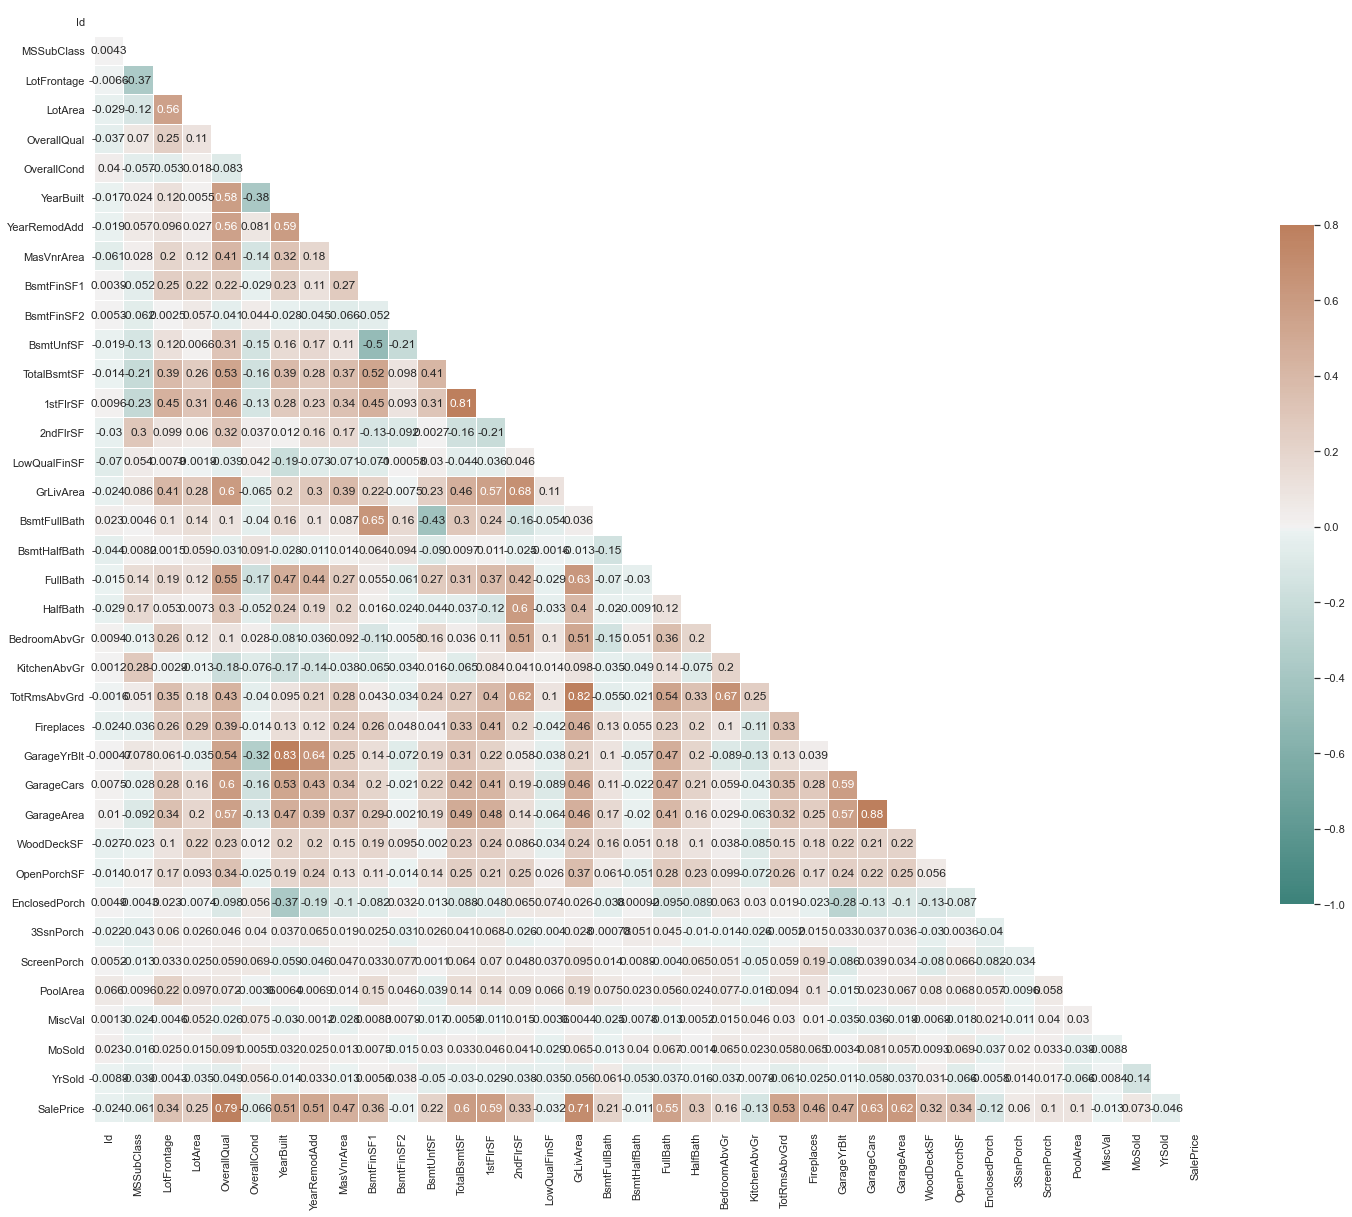

In [194]:
#correlation heatmap
corr = train.corr()

#apply a mask
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True

#sett a palette
cmap = sns.diverging_palette(180, 30, as_cmap=True)

with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(25, 25))
    sns.heatmap(corr,  mask=mask, cmap=cmap, annot=True, center=0, vmin=-1, vmax=0.8,
                square=True, cbar_kws={'shrink':.5, 'orientation': 'vertical'}, linewidth=.02);

In [6]:
full_df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    472.980137    94.244521    46.660274      21.954110     3.409589   
std     213.804841   125.338794    66.256028      61.119149    29.317331   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     334.500000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    25.000000       0.000000     0.000000   
75%     576.000000   168.000000    68.000000       0.000000     0.000000   
max    1418.000000   857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  
mean     15.060959     2.758904     43.489041     6.321918  2007.815753  
std      55.757415    40.177307    496.123024     2.703626     1.328095  
min       0.000000     0.000000      0.000000     1.000000  2006.000000  
25%       0.000000     0.000000      0.000000     5.000000  2007.000000  
50%       0.000000     0.000000      0.000000     6.000000  2008.000000  
75%       0.000000     0.000000      0.000000     8.000000  2009.000000  
max     480.000000   738.000000  15500.000000    12.000000  2010.000000  

[8 rows x 36 columns]

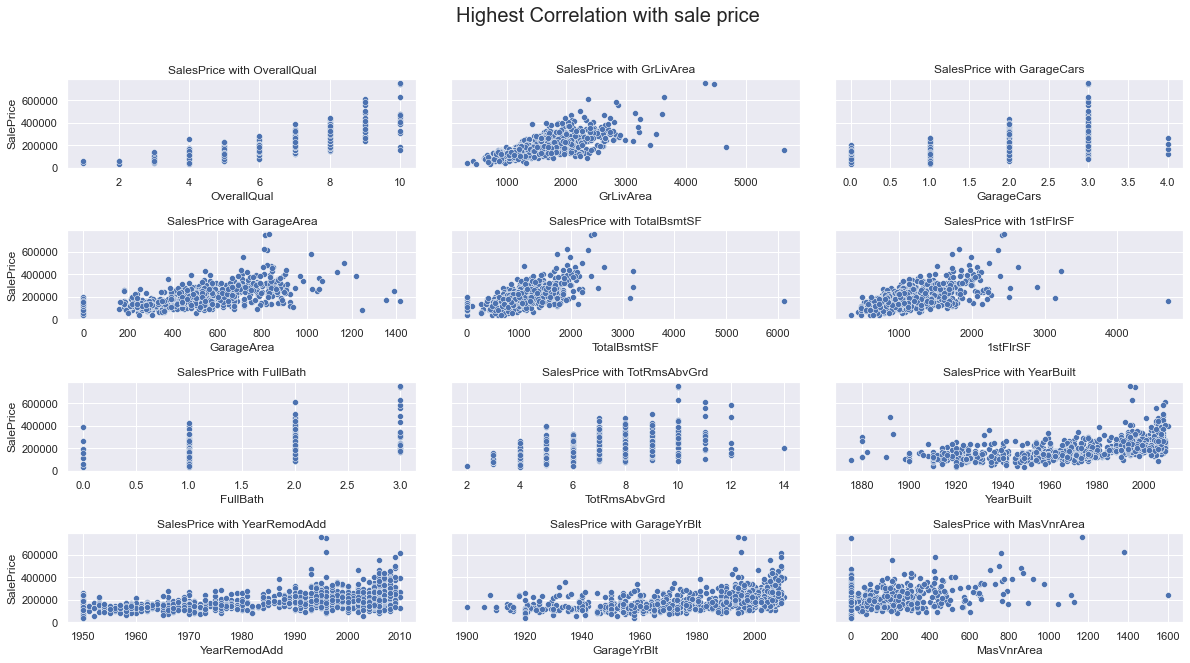

In [195]:
high_corr = corr['SalePrice'].sort_values(ascending=False)[1:][:13].index.tolist()

fig, axes = plt.subplots(4,3, figsize=(20, 10), sharey=True);
plt.subplots_adjust(hspace = 0.7, wspace=0.1)
fig.suptitle('Highest Correlation with sale price', fontsize=20)

for i,col in zip(range(12),high_corr):
    sns.scatterplot(y=train['SalePrice'], x=train[col],ax=axes[i//3][i%3])
    axes[i//3][i%3].set_title('SalesPrice with '+col)

In [196]:
#selectting the indices of outliers from the scatter plots above

drop_index = train[((train['GarageArea']>1200) & (train['SalePrice']<300000))|
                  ((train['GrLivArea']>5000) & (train['SalePrice']<300000))|
                  ((train['1stFlrSF']>4000) & (train['SalePrice']<300000))|
                  ((train['TotalBsmtSF']>5000) & (train['SalePrice']<300000))|
                  ((train['MasVnrArea']>1200) & (train['SalePrice']<700000))|
                  ((train['SalePrice']>600000))].index

Text(0.5, 1.0, 'Log SalePrice')

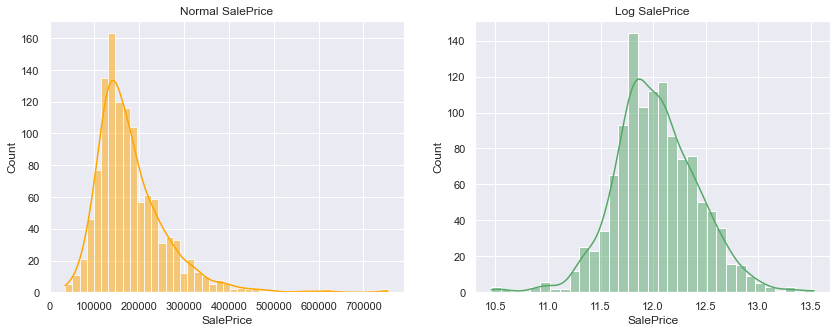

In [197]:
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(14,5))
sns.histplot(ax=axes[0],data=train, x="SalePrice", kde=True, color='orange')
axes[0].set_title('Normal SalePrice')
sns.histplot(ax=axes[1],data=train, x=np.log1p(train['SalePrice']), kde=True, color='g')
axes[1].set_title('Log SalePrice')

In [198]:
Y_train = train['SalePrice']
del train['SalePrice']

#Converting the saleprice with Logarithms to overcome the high skewness and the outliers
Y_train = np.log1p(Y_train) 

full_df = pd.concat([train.iloc[:,1:], test.iloc[:,1:]])
ntrain = len(train)
ntest = len(test)

In [199]:
print(ntrain)
print(ntest)
print(Y_train.shape)

1168
292
(1168,)


# FINDING NULL VALUES

In [200]:
#null percentage for each column

null_df = round(100*(full_df.isnull().sum().sort_values(ascending=False)/len(full_df.index)),2)\
                    .to_frame().rename(columns={0:'Null values percentage'})[:15]
null_df

Null values percentage
PoolQC                         99.52
MiscFeature                    96.30
Alley                          93.77
Fence                          80.75
FireplaceQu                    47.26
LotFrontage                    17.74
GarageCond                      5.55
GarageType                      5.55
GarageYrBlt                     5.55
GarageFinish                    5.55
GarageQual                      5.55
BsmtExposure                    2.60
BsmtFinType2                    2.60
BsmtFinType1                    2.53
BsmtCond                        2.53

<AxesSubplot:xlabel='index', ylabel='null_count'>

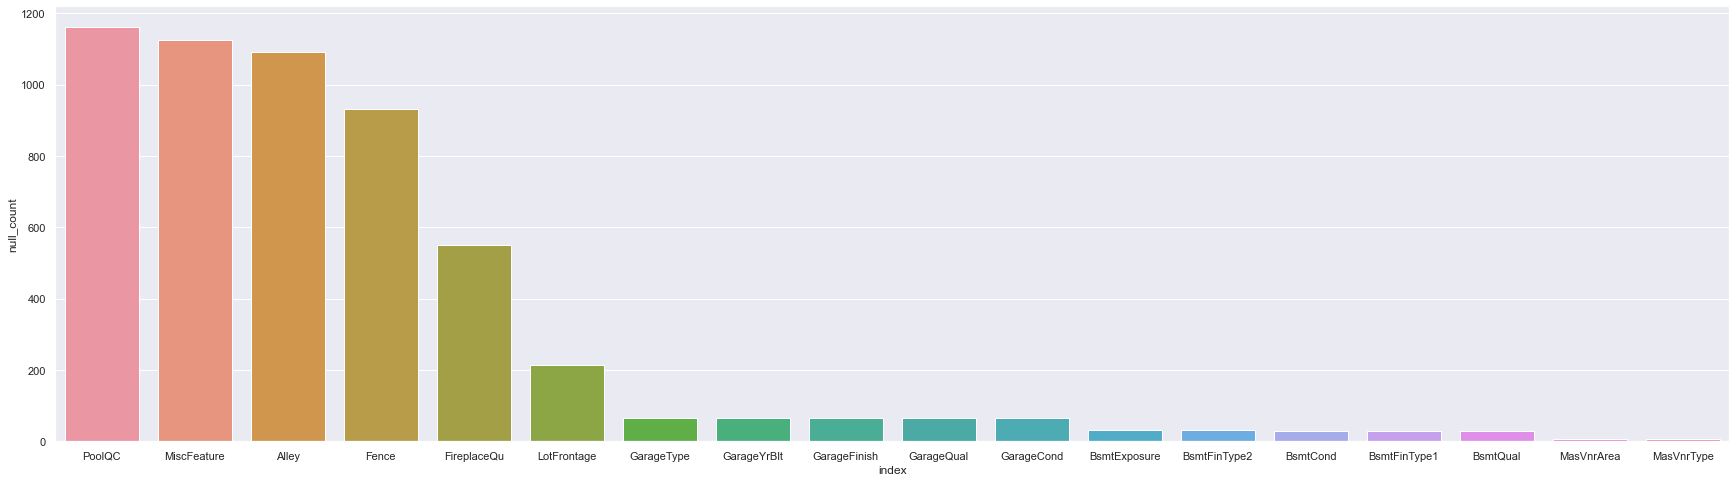

In [201]:
# nulls in columns
null_data = train.isnull().sum(axis=0).reset_index()
null_data = null_data.rename(columns={0:'null_count'})
null_data = null_data[null_data.null_count > 0].sort_values(by="null_count", ascending=False)
sns.set(rc={'figure.figsize':(30,8)})
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title("Nulls in Columns")
sns.barplot(data=null_data, x ="index", y ='null_count')

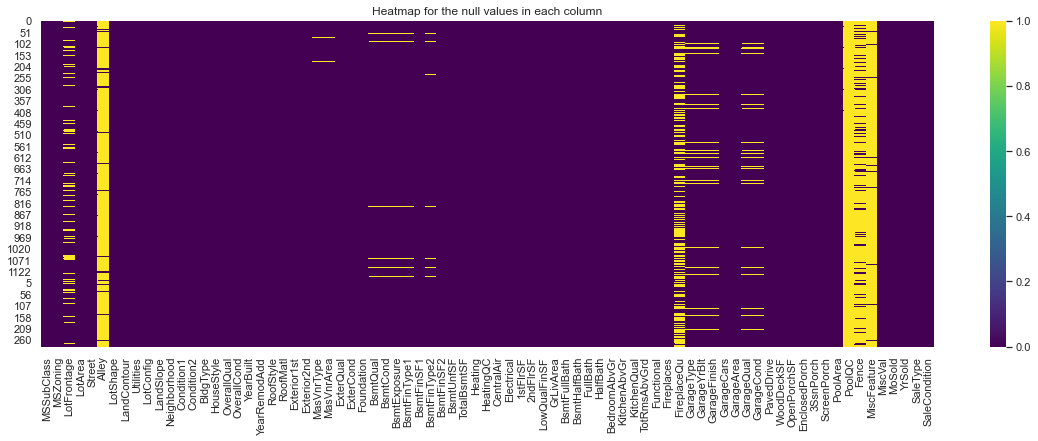

In [202]:
#Heatmap for the null values

plt.figure(figsize=(20,6))
plt.title('Heatmap for the null values in each column')
sns.heatmap(full_df.isnull(),cmap='viridis');

# Imputing missing values

In [273]:
num_cols = ['LotFrontage', 'LotArea', 'YearBuilt','YearRemodAdd', 'MasVnrArea', 
            'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
            'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
            'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
            '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

cat_cols = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour','LotConfig', 'LandSlope', 'Neighborhood',
            'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 
            'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
            'BsmtFinType2','Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual','TotRmsAbvGrd', 'Functional', 
            'FireplaceQu', 'GarageType','GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC','Fence', 
            'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition','OverallCond', 'YrSold','OverallQual']



# Univariate analysis

In [274]:
col_desc ={
"SalePrice":"The property's sale price in dollars. This is the target variable that you're trying to predict.",
"MSSubClass":"The building class",
"MSZoning":"The general zoning classification",
"LotFrontage":"Linear feet of street connected to property",
"LotArea":"Lot size in square feet",
"Street":"Type of road access",
"Alley":"Type of alley access",
"LotShape":"General shape of property",
"LandContour":"Flatness of the property",
"Utilities":"Type of utilities available",
"LotConfig":"Lot configuration",
"LandSlope":"Slope of property",
"Neighborhood":"Physical locations within Ames city limits",
"Condition1":"Proximity to main road or railroad",
"Condition2":"Proximity to main road or railroad (if a second is present)",
"BldgType":"Type of dwelling",
"HouseStyle":"Style of dwelling",
"OverallQual":"Overall material and finish quality",
"OverallCond":"Overall condition rating",
"YearBuilt":"Original construction date",
"YearRemodAdd":"Remodel date",
"RoofStyle":"Type of roof",
"RoofMatl":"Roof material",
"Exterior1st":"Exterior covering on house",
"Exterior2nd":"Exterior covering on house (if more than one material)",
"MasVnrType":"Masonry veneer type",
"MasVnrArea":"Masonry veneer area in square feet",
"ExterQual":"Exterior material quality",
"ExterCond":"Present condition of the material on the exterior",
"Foundation":"Type of foundation",
"BsmtQual":"Height of the basement",
"BsmtCond":"General condition of the basement",
"BsmtExposure":"Walkout or garden level basement walls",
"BsmtFinType1":"Quality of basement finished area",
"BsmtFinSF1":"Type 1 finished square feet",
"BsmtFinType2":"Quality of second finished area (if present)",
"BsmtFinSF2":"Type 2 finished square feet",
"BsmtUnfSF":"Unfinished square feet of basement area",
"TotalBsmtSF":"Total square feet of basement area",
"Heating":"Type of heating",
"HeatingQC":"Heating quality and condition",
"CentralAir":"Central air conditioning",
"Electrical":"Electrical system",
"1stFlrSF":"First Floor square feet",
"2ndFlrSF":"Second floor square feet",
"LowQualFinSF":"Low quality finished square feet (all floors)",
"GrLivArea":"Above grade (ground) living area square feet",
"BsmtFullBath":"Basement full bathrooms",
"BsmtHalfBath":"Basement half bathrooms",
"FullBath":"Full bathrooms above grade",
"HalfBath":"Half baths above grade",
"Bedroom":"Number of bedrooms above basement level",
"Kitchen":"Number of kitchens",
"KitchenQual":"Kitchen quality",
"TotRmsAbvGrd":"Total rooms above grade (does not include bathrooms)",
"Functional":"Home functionality rating",
"Fireplaces":"Number of fireplaces",
"FireplaceQu":"Fireplace quality",
"GarageType":"Garage location",
"GarageYrBlt":"Year garage was built",
"GarageFinish":"Interior finish of the garage",
"GarageCars":"Size of garage in car capacity",
"GarageArea":"Size of garage in square feet",
"GarageQual":"Garage quality",
"GarageCond":"Garage condition",
"PavedDrive":"Paved driveway",
"WoodDeckSF":"Wood deck area in square feet",
"OpenPorchSF":"Open porch area in square feet",
"EnclosedPorch":"Enclosed porch area in square feet",
"3SsnPorch":"Three season porch area in square feet",
"ScreenPorch":"Screen porch area in square feet",
"PoolArea":"Pool area in square feet",
"PoolQC":"Pool quality",
"Fence":"Fence quality",
"MiscFeature":"Miscellaneous feature not covered in other categories",
"MiscVal":"$Value of miscellaneous feature",
"MoSold":"Month Sold",
"YrSold":"Year Sold",
"SaleType":"Type of sale",
"SaleCondition":"Condition of sale"
}

# Categoical variables

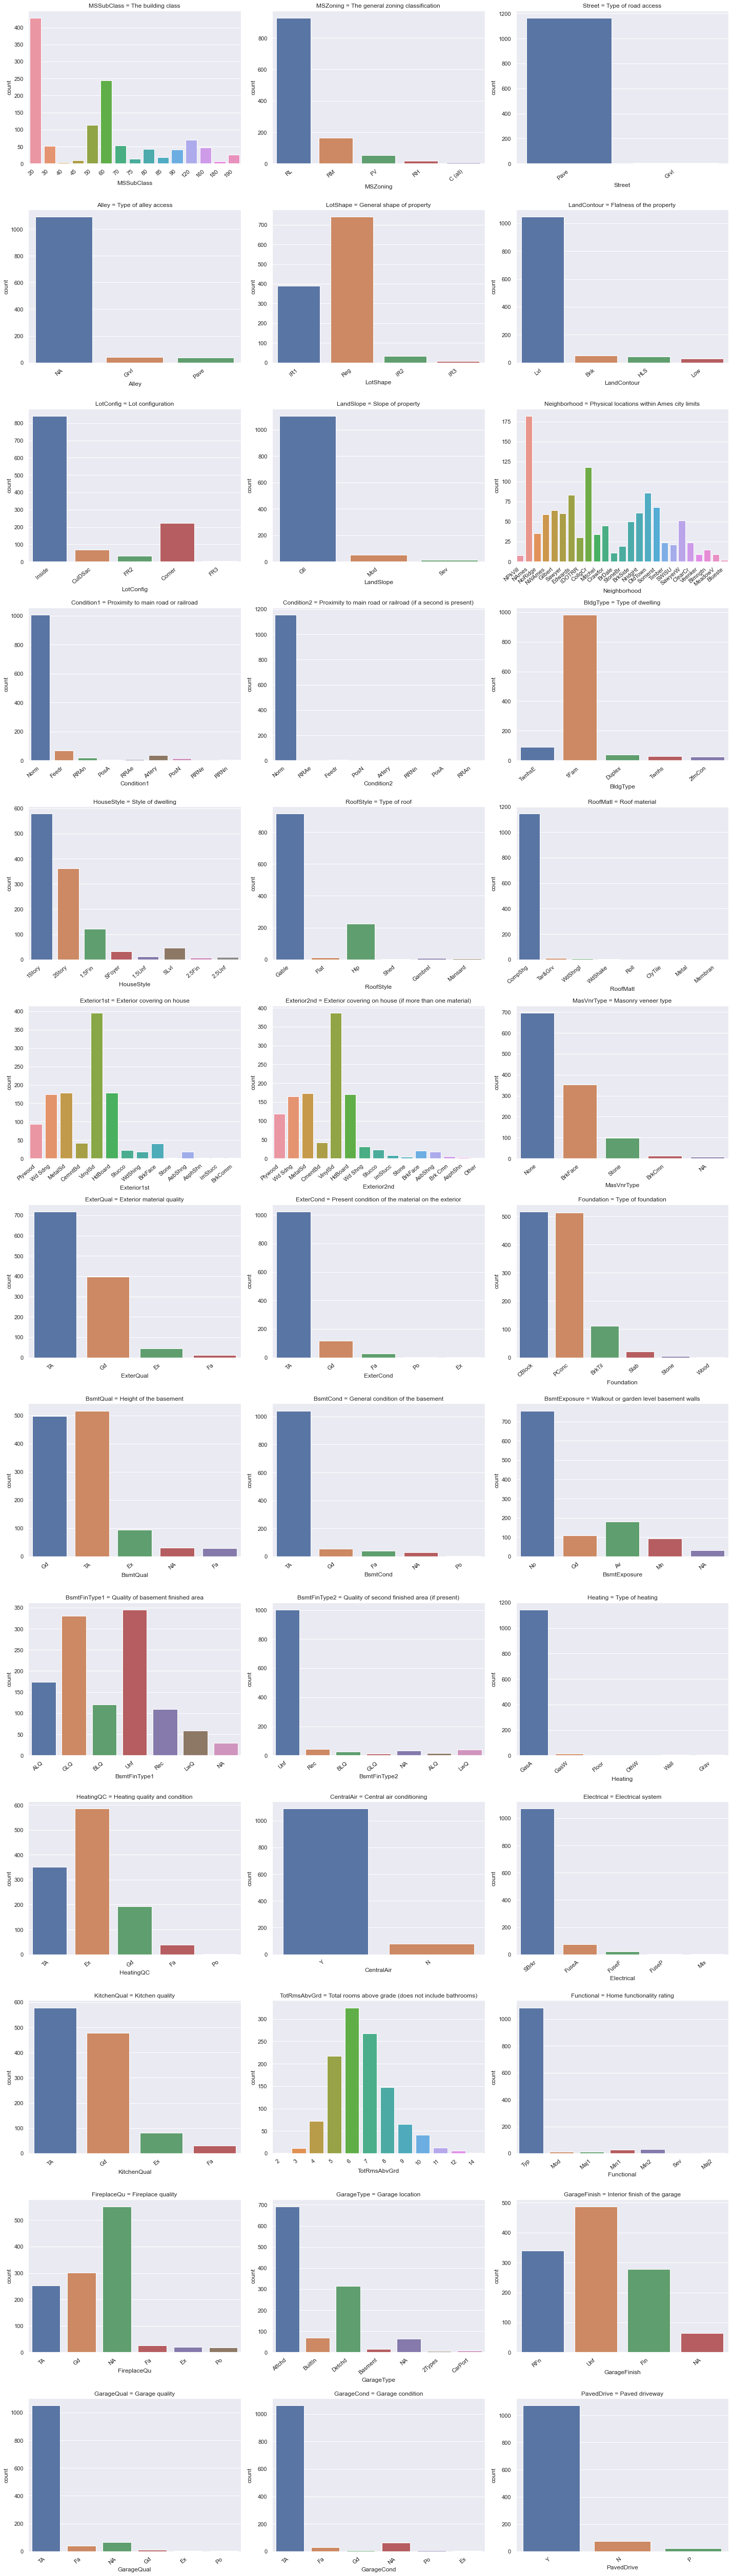

In [276]:
# count plot of all categorical columns

f, axes = plt.subplots(13,3,figsize=(20,70), sharex=False)
for f,ax in zip(cat_cols, axes.ravel()):
    sns.countplot(train[f], ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.set_title(f + " = " +col_desc[f])
    
plt.tight_layout()
plt.show()

# Continuous variable

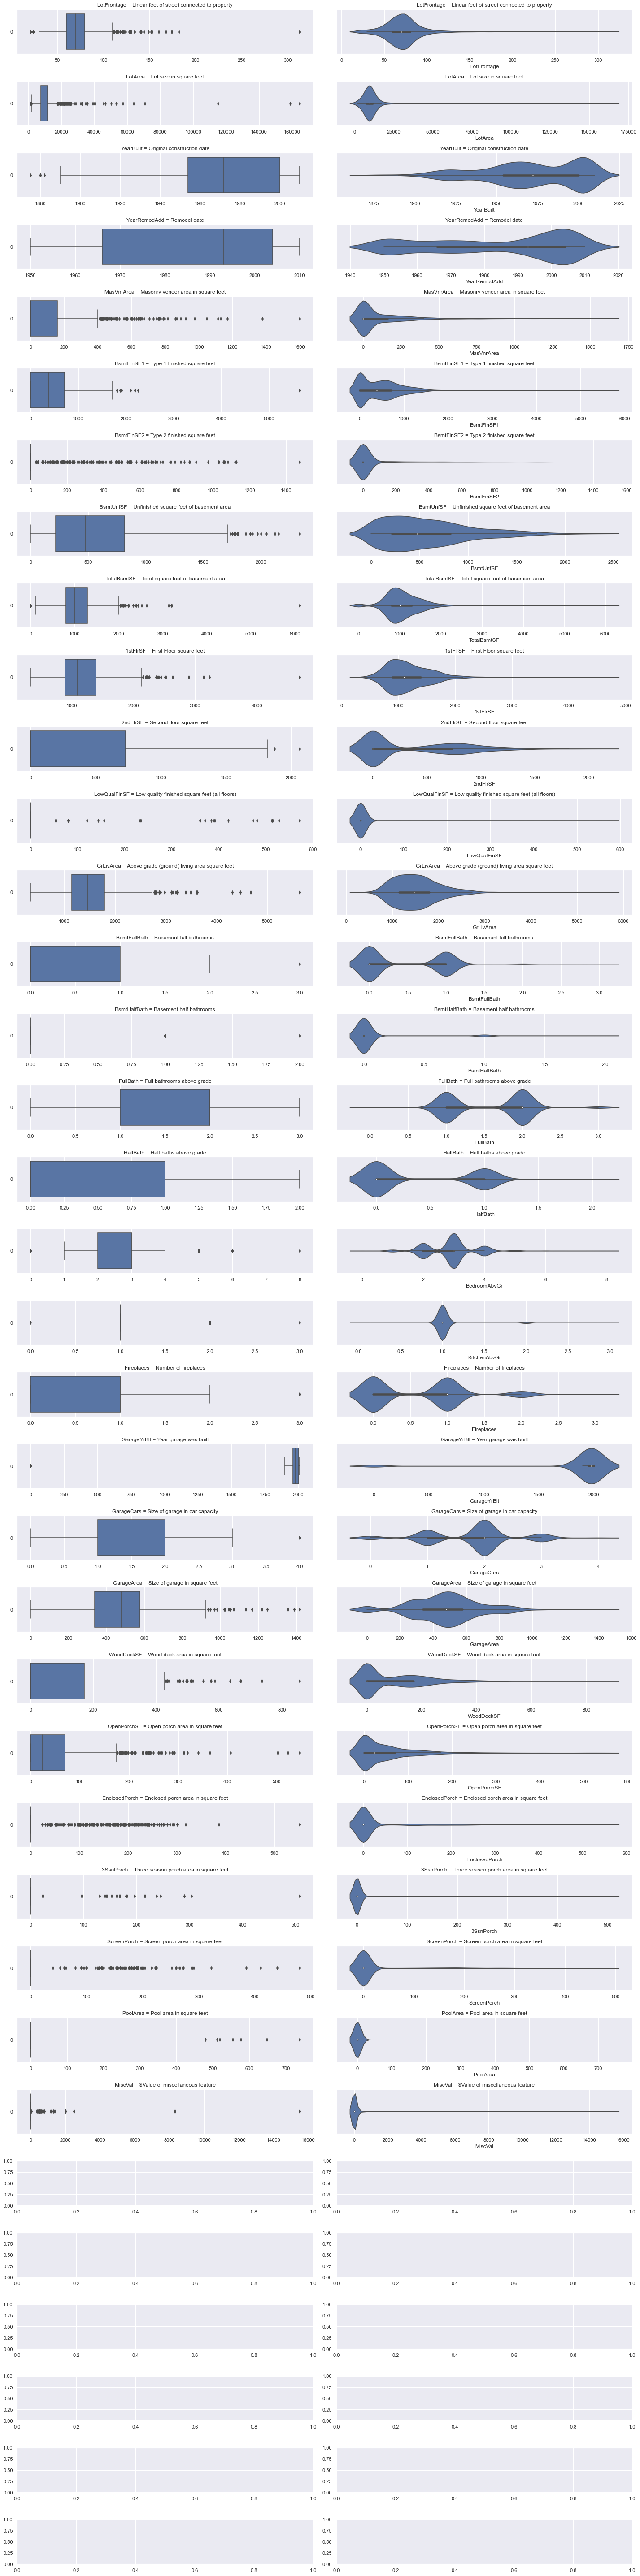

In [277]:
f, axes = plt.subplots(36,2,figsize=(20,80), sharex=False, sharey=False)
for f,ax in zip(num_cols, axes):
    sns.boxplot(data=train[f], ax=ax[0], orient="h")
    sns.violinplot(data=train, x=f, ax=ax[1])
    ax[0].set_title(f + " = " +col_desc[f] if f in col_desc.keys() else "") 
    ax[1].set_title(f + " = " +col_desc[f] if f in col_desc.keys() else "") 
plt.tight_layout()
plt.show()

In [206]:
null_num = full_df[num_cols].isnull().sum()[full_df[num_cols].isnull().sum()>0].index
print('All categorical coulmns that have null values that are : \n\n{}'.format(null_num.values))

All categorical coulmns that have null values that are : 

['LotFrontage' 'MasVnrArea' 'GarageYrBlt']


In [207]:
null_cat1 = full_df[cat_cols].isnull().sum()[full_df[cat_cols].isnull().sum()>0].index
print('All categorical coulmns that have null values that are : \n\n{}'.format(null_cat.values))


All categorical coulmns that have null values that are : 

['Alley' 'MasVnrType' 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1'
 'BsmtFinType2' 'Electrical' 'FireplaceQu' 'GarageType' 'GarageFinish'
 'GarageQual' 'GarageCond' 'PoolQC' 'Fence' 'MiscFeature']


In [208]:
full_df['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [209]:
# In this column all rows only one value are 'AllPub', so it will add nothing to the model

del full_df['Utilities']

Based on the description of the data i will fill the null values as following

In [210]:
# Basement columns
BS_col = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 
          'BsmtFullBath','MasVnrArea','BsmtHalfBath','BsmtFinSF1', 
          'BsmtFinSF2', 'BsmtUnfSF']

# it means No Basement
for col in BS_col:
    full_df[col].fillna(0, inplace=True) 
    
full_df['BsmtCond'].fillna('NA', inplace=True)         # It means No Basement(general condition)
full_df['BsmtExposure'].fillna('NA', inplace=True)     # It means No Basement(walkout or garden level walls)
full_df['BsmtQual'].fillna('NA', inplace=True)         # It means No Basement(height of the basement)
full_df['BsmtFinType1'].fillna('NA', inplace=True)     # It means that No Basement(basement finished area)
full_df['BsmtFinType2'].fillna('NA', inplace=True)

In [211]:
#Garage Columns
gr_col = ['GarageType','GarageYrBlt','GarageFinish','GarageCars',
          'GarageArea','GarageQual','GarageCond']

# it means NO Garage
# Numeric
full_df['GarageYrBlt'].fillna(0, inplace=True)
full_df['GarageCars'].fillna(0, inplace=True)          
full_df['GarageArea'].fillna(0, inplace=True)

# Categorical
full_df['GarageCond'].fillna('NA', inplace=True)       
full_df['GarageQual'].fillna('NA', inplace=True)       
full_df['GarageType'].fillna('NA', inplace=True)       
full_df['GarageFinish'].fillna('NA', inplace=True)  

In [212]:
full_df['MasVnrType'].fillna('NA', inplace=True)     # Meaning that NO Masonry veneer
full_df['PoolQC'].fillna('NA', inplace=True)         # Meaning that NO Pool 
full_df['Alley'].fillna('NA', inplace=True)          # Meaning that NO Alley ccess
full_df['Fence'].fillna('NA', inplace=True)          # Meaning that NO Fence
full_df['FireplaceQu'].fillna('NA', inplace=True)    # Meaning that NO Fireplace
full_df['MiscFeature'].fillna('NA', inplace=True)    # Meaning that NO Miscellaneous feature not covered in 

In [213]:
full_df['Functional'].fillna('Typ' ,inplace=True)    # Typical Functionality
full_df['Electrical'].fillna('SBrkr' ,inplace=True)  # Standard Circuit Breakers & Romex
full_df['SaleType'].fillna('Oth' ,inplace=True)      # Other
full_df['KitchenQual'].fillna('TA' ,inplace=True)    # Typical/Average
full_df['SaleType'].fillna('Oth' ,inplace=True)      # Other
full_df['Exterior1st'].fillna('Other' ,inplace=True) # Other
full_df['Exterior2nd'].fillna('Other' ,inplace=True) # Other
 

In [214]:
# split the data before imputing the numeric data to avoid (Data lackage)
train = full_df[:ntrain].reset_index().drop('index',axis=1)
test = full_df[ntrain:].reset_index().drop('index',axis=1)


In [215]:
for data in [train,test]:
    # LotFrontage: Linear feet of street connected to property
    data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].apply(lambda x: x.fillna(x.median()))
    
    # Meaning that NO Masonry veneer
    data['MSZoning'] = data['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [216]:
#combine all the data together again
full_df=pd.concat([train,test])


In [217]:
full_df.isnull().sum().max()

0

In [218]:
rows, cols = full_df.shape
print('Our new data has {} rows and {} columns'.format(rows, cols))

Our new data has 1460 rows and 78 columns


# Adding a new feature

In [219]:
# Total Area
full_df['TotalSF'] = full_df['TotalBsmtSF'] + full_df['1stFlrSF'] + full_df['2ndFlrSF']

In [221]:
# add the column to numeric columns to normalize them
# add the column to numeric columns to normalize them
num_cols.append('TotalSF')


# Prepare the data for ML

In [224]:
# Convert all categorical collumns to numeric values
from sklearn.preprocessing  import StandardScaler, LabelEncoder, MinMaxScaler, RobustScaler

for c in cat_cols:
    lbl = LabelEncoder() 
    full_df[c] = lbl.fit_transform(full_df[c])

In [225]:
full_df.select_dtypes('O').columns

Index([], dtype='object')

In [226]:
#lets create a dataframe for the numeric columns with high skewness

skewness = pd.DataFrame()

skewness[['Positive Columns','Skewness(+v)']] = full_df[numerical_cols].skew().sort_values(ascending=False)[:10].reset_index()
skewness[['Negative Columns','Skewness(-v)']] = full_df[numerical_cols].skew().sort_values(ascending=True)[:10].reset_index()
skewness.columns = pd.MultiIndex.from_tuples([('Positive Skewness', 'Columns'), ('Positive Skewness', 'Skewness'),
                                              ('Negative Skewness', 'Columns'), ('Negative Skewness', 'Skewness')])
skewness

Positive Skewness            Negative Skewness           
            Columns   Skewness           Columns   Skewness
0           MiscVal  24.476794            Street -15.518770
1          PoolArea  14.828374       GarageYrBlt  -3.869501
2           LotArea  12.207688       LandContour  -3.162499
3         3SsnPorch  10.304342          MSZoning  -1.735395
4      LowQualFinSF   9.011341         YearBuilt  -0.613461
5      KitchenAbvGr   4.488397          LotShape  -0.610175
6        BsmtFinSF2   4.255261      YearRemodAdd  -0.503562
7       ScreenPorch   4.122214        GarageCars  -0.342549
8      BsmtHalfBath   4.103403             Alley  -0.322730
9     EnclosedPorch   3.089872          FullBath   0.036562

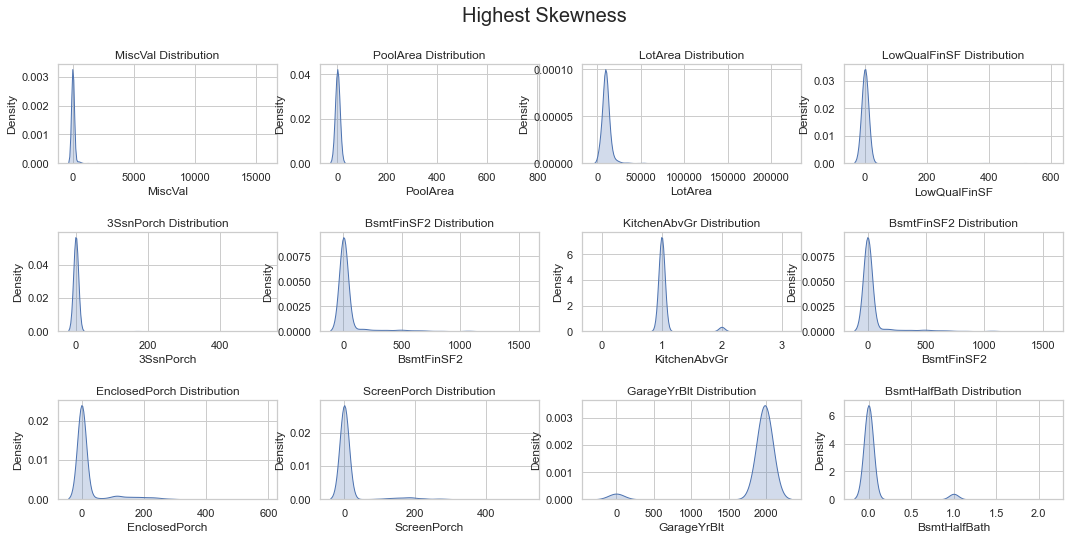

In [227]:
#Visualize columns with highest Skewness
cols = ['MiscVal','PoolArea','LotArea','LowQualFinSF','3SsnPorch','BsmtFinSF2','KitchenAbvGr',
        'BsmtFinSF2','EnclosedPorch','ScreenPorch','GarageYrBlt','BsmtHalfBath']

sns.set_style('whitegrid')
fig, axes = plt.subplots(3,4, figsize=(18, 8));
plt.subplots_adjust(hspace = 0.7, wspace=0.2)
fig.suptitle('Highest Skewness', fontsize=20)

for i,col in zip(range(12),cols):
    sns.kdeplot(full_df[col], ax=axes[i//4][i%4], fill=True);
    axes[i//4][i%4].set_title(col+' Distribution')

To overcome the high skewness issue, i will transform the data into logarithm values.

# Normalizing and encoding the data

In [229]:
#convert all categorical columns to integer values

df = full_df.copy()

for col in cat_cols :
    df[col] = df[col].astype(int)

# convert our categorical columns to dummies instead of LabelEncoding
for col in cat_cols :
    dumm = pd.get_dummies(df[col], prefix = col, dtype=int)
    df = pd.concat([df,dumm], axis=1)
    
df.drop(cat_cols , axis=1, inplace=True)


In [230]:
#Normalize our numeric data
#
df[num_cols]=np.log1p(df[num_cols]) #Normalize the data with Logarithms

train_set = df[:ntrain].reset_index().drop('index',axis=1)
test_set = df[ntrain:].reset_index().drop('index',axis=1)

#dropping the outliers
train_set = train_set.drop(drop_index)
Y_train = Y_train.drop(drop_index)

In [231]:
train_set.shape

(1159, 359)

In [232]:
Y_train.shape

(1159,)

# INITIALIZING OUR MODELS

Evaluate the Regression models based on different metrics.


In [243]:
# define models to test:

base_models = {"Elastic Net":make_pipeline(RobustScaler(),                    #Elastic Net model(Regularized model)
                                            ElasticNet(alpha=0.0005,
                                                       l1_ratio=0.9)),
               "Kernel Ridge" :KernelRidge(),                                 #Kernel Ridge model(Regularized model)
               "Lasso" : make_pipeline(RobustScaler(), Lasso(alpha =0.0005,   #Lasso model(Regularized model)
                                                             random_state=1)),
               "Random Forest": RandomForestRegressor(n_estimators=300),      #Random Forest model
               "SVM": SVR(),                                                  #Support Vector Machines
               "XGBoost": XGBRegressor(),                                     #XGBoost model                                           
               "Gradient Boosting":make_pipeline(StandardScaler(),
                                                 GradientBoostingRegressor(n_estimators=3000, #GradientBoosting model
                                                                           learning_rate=0.005,     
                                                                           max_depth=4, max_features='sqrt',
                                                                           min_samples_leaf=15, min_samples_split=10, 
                                                                           loss='huber', random_state =5))}

Iterate the models and compute train/test results

In [244]:
# Preprocessing, fitting, making predictions and scoring for every model:
models_data = {'R^2':{'Training':{},'Testing':{}},
               'Adjusted R^2':{'Training':{},'Testing':{}},
               'MAE':{'Training':{},'Testing':{}},
               'MSE':{'Training':{},'Testing':{}},
               'RMSE':{'Training':{},'Testing':{}}}

X_train, X_test, y_train, y_test = train_test_split(train_set, Y_train, test_size=0.2, random_state=42)
p = train_set.shape[1]
train_n = X_train.shape[0]
test_n = X_test.shape[0]

In [245]:
for name in base_models:
    #fitting the model
    model = base_models[name].fit(X_train, y_train)
    #make predictions with train and test datasets
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    #calculate the R-Squared for training and testing
    r2_train,r2_test = model.score(X_train, y_train), model.score(X_test, y_test)
    models_data['R^2']['Training'][name], models_data['R^2']['Testing'][name] = r2_train, r2_test
            
    #calculate the Adjusted R-Squared for training and testing
    adj_train, adj_test = (1-(1-r2_train)*(train_n-1)/(train_n-p-1)) ,(1-(1-r2_test)*(train_n-1)/(train_n-p-1))
    models_data['Adjusted R^2']['Training'][name], models_data['Adjusted R^2']['Testing'][name] = adj_train, adj_test
               
    #calculate the Mean absolute error for training and testing
    mae_train, mae_test = mean_absolute_error(y_train, y_pred_train), mean_squared_error(y_test, y_pred_test)         
    models_data['MAE']['Training'][name], models_data['MAE']['Testing'][name] = mae_train, mae_test
               
    #calculate Mean square error for training and testing
    mse_train, mse_test = mean_squared_error(y_train, y_pred_train), mean_squared_error(y_test, y_pred_test)
    models_data['MSE']['Training'][name], models_data['MSE']['Testing'][name] = mse_train, mse_test

    #calculate Root mean error for training and testing    
    rmse_train, rmse_test = np.sqrt(mse_train), np.sqrt(mse_test)
    models_data['RMSE']['Training'][name], models_data['RMSE']['Testing'][name] = rmse_train, rmse_test
    
    print('\n========================={}========================='.format(name))
    print('**********Training**********************Testing********')
    print('R^2    : ',r2_train,' '*(25-len(str(r2_train))),r2_test) 
    print('Adj R^2: ',adj_train,' '*(25-len(str(adj_train))),adj_test) 
    print('MAE    : ',mae_train,' '*(25-len(str(mae_train))),mae_test) 
    print('MSE    : ',mse_train,' '*(25-len(str(mse_train))),mse_test) 
    print('RMSE   : ',rmse_train,' '*(25-len(str(rmse_train))),rmse_test)



=========================Elastic Net=========================
**********Training**********************Testing********
R^2    :  0.944986513573133          0.8607971488904131
Adj R^2:  0.9101543413910427         0.7726598939550662
MAE    :  0.06440257699762048        0.021264538139074172
MSE    :  0.008313122384981294       0.021264538139074172
RMSE   :  0.0911763257922872         0.14582365425085936

=========================Kernel Ridge=========================
**********Training**********************Testing********
R^2    :  0.9566240581232008         0.8459125801827345
Adj R^2:  0.9291602783458272         0.7483510568769174
MAE    :  0.059074994549776834       0.023538295295951146
MSE    :  0.0065545657402575645      0.023538295295951146
RMSE   :  0.08096027260488668        0.15342195180596271

=========================Lasso=========================
**********Training**********************Testing********
R^2    :  0.9436948365772959         0.861074568854809
Adj R^2:  0.90804483010

In [246]:
R_2 = pd.DataFrame(models_data['R^2']).sort_values(by='Testing',ascending=False)
Adjusted_R_2 = pd.DataFrame(models_data['Adjusted R^2']).sort_values(by='Testing',ascending=False)
MAE = pd.DataFrame(models_data['MAE']).sort_values(by='Testing',ascending=True)
MSE = pd.DataFrame(models_data['MSE']).sort_values(by='Testing',ascending=True)
RMSE = pd.DataFrame(models_data['RMSE']).sort_values(by='Testing',ascending=True)

# Visualizing our results

In [248]:
#order the results by testing values
import plotly.express as px

px.line(data_frame=R_2.reset_index(),
        x='index',y=['Training','Testing'],
        title='R-Squared for training and testing')

In [249]:
#order the results by testing values

px.line(data_frame=Adjusted_R_2.reset_index(),
        x='index',y=['Training','Testing'],
        title='Adjusted R-Squared for training and testing')


In [250]:
#order the results by testing values

px.line(data_frame=MAE.reset_index(),
        x='index',y=['Training','Testing'],
        title='Mean absolute error for training and testing')

In [251]:
#order the results by testing values

px.line(data_frame=MSE.reset_index(),
        x='index',y=['Training','Testing'],
        title='Mean square error for training and testing')

In [252]:
#order the results by testing values

px.line(data_frame=RMSE.reset_index(),
        x='index',y=['Training','Testing'],
        title='Root mean square error for training and testing')

In [ ]:
I found that Elastic Net estimator is the best choice, it has:
Highest score with testing data (low variance) and reasonable score with training data (low bias).
Lowest error with training data and also a not bad error with training data.
To evaluate the performance of any machine learning model we need to test it on some unseen data, based on the models performance on unseen data we can say weather our model is :

Under-fitting.
Over-fitting.
Well generalized.
Cross validation (CV) is one of the technique used to test the effectiveness of a machine learning models, it is also a re-sampling procedure used to evaluate a model if we have a limited data.
To perform CV we need to keep aside a sample/portion of the data on which is not used to train the model, later use this sample for testing/validating. So, k-fold cross validation is used for two main purposes:

To tune hyper parameters.
To better evaluate the performance of a model.



In [254]:
# prepare configuration for cross validation test

#Create two dictionaries to store the results of R-Squared and RMSE 
r_2_results = {'R-Squared':{},'Mean':{},'std':{}}   
rmse_results = {'RMSE':{},'Mean':{},'std':{}}

n_folds = 5
kfold = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_set)

for name in base_models:
    model = base_models[name]
    r_2 = cross_val_score(model, train_set, Y_train, scoring='r2', cv=kfold)   #R-Squared 
    rms = np.sqrt(-cross_val_score(model, train_set, Y_train, cv=kfold,        #RMSE
                                   scoring='neg_mean_squared_error'))
    
    #save the R-Squared reults
    r_2_results['R-Squared'][name] = r_2
    r_2_results['Mean'][name] = r_2.mean()
    r_2_results['std'][name] = r_2.std()
    
    #save the RMSE reults
    rmse_results['RMSE'][name] = rms
    rmse_results['Mean'][name] = rms.mean()
    rmse_results['std'][name] = rms.std()

# VISUALIZING THE RESULT

R-SQUARED

In [267]:
#visualizing the results of R-Squared for each model

r_2_cv_results = pd.DataFrame(index=r_2_results['R-Squared'].keys())

#append the max R-Squared for each model to the dataframe
r_2_cv_results['Max'] = [r_2_results['R-Squared'][m].max() for m in r_2_results['R-Squared'].keys()]
#append the mean of all R-Squared for each model to the dataframe
r_2_cv_results['Mean'] = [r_2_results['Mean'][m] for m in r_2_results['Mean'].keys()]
#append the min R-Squared for each model to the dataframe
r_2_cv_results['Min'] = [r_2_results['R-Squared'][m].min() for m in r_2_results['R-Squared'].keys()]
#append the std of all R-Squared for each model to the dataframe
r_2_cv_results['std'] = [r_2_results['std'][m] for m in r_2_results['std'].keys()]

r_2_cv_results = r_2_cv_results.sort_values(by='Mean',ascending=False)


In [265]:
r_2_cv_results

Max      Mean       Min       std
Lasso              0.921678  0.895140  0.875068  0.017667
Elastic Net        0.921638  0.894811  0.874253  0.017626
Gradient Boosting  0.927382  0.891024  0.850726  0.026385
Kernel Ridge       0.919749  0.883691  0.847474  0.023681
SVM                0.893655  0.862791  0.821123  0.026010
Random Forest      0.891734  0.855023  0.804397  0.030259
XGBoost            0.882281  0.849632  0.823211  0.023152

# RMSE

In [268]:
#visualize the results of RMSE for each model

rmse_cv_results = pd.DataFrame(index=rmse_results['RMSE'].keys())

#append the max R-Squared for each model to the dataframe
rmse_cv_results['Max'] = [rmse_results['RMSE'][m].max() for m in rmse_results['RMSE'].keys()]
#append the mean of all R-Squared for each model to the dataframe
rmse_cv_results['Mean'] = [rmse_results['Mean'][m] for m in rmse_results['Mean'].keys()]
#append the min R-Squared for each model to the dataframe
rmse_cv_results['Min'] = [rmse_results['RMSE'][m].min() for m in rmse_results['RMSE'].keys()]
#append the std of all R-Squared for each model to the dataframe
rmse_cv_results['std'] = [rmse_results['std'][m] for m in rmse_results['std'].keys()]

rmse_cv_results = rmse_cv_results.sort_values(by='Mean',ascending=True)

In [269]:
rmse_cv_results

Max      Mean       Min       std
Lasso              0.139089  0.125065  0.107589  0.012387
Elastic Net        0.138773  0.125264  0.107616  0.012358
Gradient Boosting  0.150942  0.126986  0.103597  0.016594
Kernel Ridge       0.152577  0.131432  0.108905  0.014582
SVM                0.165232  0.142955  0.125367  0.015141
Random Forest      0.173927  0.146330  0.122539  0.016713
XGBoost            0.164265  0.149602  0.131901  0.010652

According the train/test and cross validation of the models i think that ElasticNet is the best choice because:

In train/test:
ElasticNet preforms good in train/test with score (94.4986%) for training and score (89.07971%) for testing.
ElasticNet hase also low Root mean square error for training and teting.

In cross validation :
    
ElasticNet reached high mean score with cross validation also (92.1638%) with Standard deviation (1.7626%)

ElasticNet hase also a low mean value of Root mean square error values (13.8773%) for cross validation with Standard deviation (1.2358%)

# Lets try to improve the result of our top models

ElasticNet model

In [270]:
parametersGrid = {"max_iter": [1, 5, 10, 100],
                  "alpha": [0.0005, 0.005, 0.001, 0.01, 0.1, 1, 10, 100],
                  "l1_ratio": np.arange(0.0, 1.0, 0.1)}

kfold = KFold(n_splits=10)

eNet  = ElasticNet()
eNet_grid = GridSearchCV(eNet, parametersGrid, scoring='r2', cv=kfold)
eNet_grid.fit(train_set, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=ElasticNet(),
             param_grid={'alpha': [0.0005, 0.005, 0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_iter': [1, 5, 10, 100]},
             scoring='r2')

In [272]:
ElasticNet_model = base_models['Elastic Net']
r2_1 = round(cross_val_score(ElasticNet_model ,train_set, Y_train, scoring='r2',cv=kfold).mean()*100, 3)
r2_2 = round(eNet_grid.score(train_set, Y_train)*100, 3)
print('ElasticNet Model : ')
print(f'Before tuning the hyperparmeters ---> {r2_1} \nAfter tuning the hyperparmeters ---> {r2_2}')

ElasticNet Model : 
Before tuning the hyperparmeters ---> 89.677 
After tuning the hyperparmeters ---> 92.821
